<a href="https://colab.research.google.com/github/Alekhyo/Regression/blob/master/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
def plotData(X,y):
    """
        Function to plot data between Level and Salary
        
    """
    plt.scatter(X,y,label="data points")
    plt.legend()
    plt.xlabel('Level')
    plt.ylabel('Salary')
    

## Analysing data

In [0]:
data=pd.read_csv("Position_Salaries.csv")

In [0]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [0]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [0]:
data.shape

(10, 3)

In [0]:
X=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

# Visualising Data

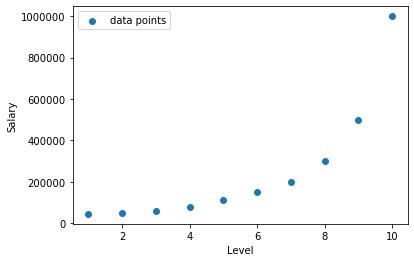

In [0]:
plotData(X,y)

# The graph has non-linear relationship between Salary and Podition. Polynomial Regression is preferable over Linear Regression

In [0]:
X=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Linear Regression

In [0]:
lr=LinearRegression()

In [0]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=lr.predict(X_test)

In [0]:
print("R2 score of Linear Regression Model is ",r2_score(y_test,y_pred))
print("RMSE of Linear Regression Model is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score of Linear Regression Model is  0.9779215014976274
RMSE of Linear Regression Model is  32689.437552745294


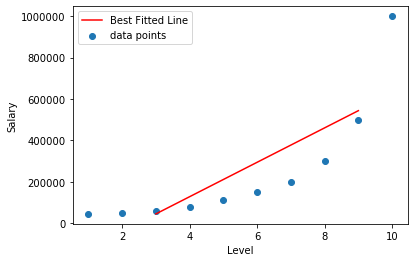

In [0]:
plotData(X,y)
plt.plot(X_test,L.predict(X_test),label="Best Fitted Line",color='r')
plt.legend()
plt.show()

## Polynomial Regression

In [0]:
def plot_polyCurve(X,y,degree):
    
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
  
    X_test_poly =poly.fit_transform(X)
    y_pred=lr.predict(X_test_poly)
    
    plt.plot(X,y_pred, label="Model",color='red')
    plt.scatter(X, y, label="data",color='green')
    plt.legend()
    plt.show()
    
    print("The r2 score of the model is " ,r2_score(y,y_pred))

## Polynomial Regression for degree=2

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [0]:
X_poly = poly.fit_transform(X_train)

Lr_poly = LinearRegression()
Lr_poly.fit(X_poly,y_train)

X_test_poly =poly.fit_transform(X_test)
y_pred=Lr_poly.predict(X_test_poly)

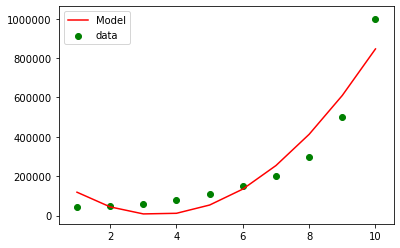

The r2 score of the model is  0.9162082221443942
RMSE score of the model is  119393.19375211064


In [0]:
plot_polyCurve(X,y,2)
print("RMSE score of the model is ",np.sqrt(mean_squared_error(y_test,y_pred)))

## Polynomial Regression for degree=5

In [0]:
poly = PolynomialFeatures(degree=5)

In [0]:
X_poly = poly.fit_transform(X_train)

Lr_poly = LinearRegression()
Lr_poly.fit(X_poly,y_train)

X_test_poly =poly.fit_transform(X_test)
y_pred=Lr_poly.predict(X_test_poly)

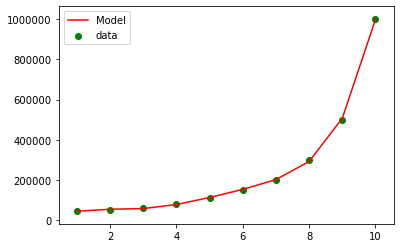

The r2 score of the model is  0.9997969027099755
RMSE score of the model is  16512.54757112578


In [0]:
plot_polyCurve(X,y,5)
print("RMSE score of the model is ",np.sqrt(mean_squared_error(y_test,y_pred)))

### A function to calculate polynomial regression for various degrees

In [0]:
def find_best_polynomialRegression(X,y,deg):
    
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly,y_train)
    
    X_test_poly =poly.fit_transform(X_test)
    y_pred=lr_poly.predict(X_test_poly)
    
    training_r2_score = r2_score(y_train, lr_poly.predict(X_train_poly))
    test_r2_score = r2_score(y_test,y_pred)
    
    return training_r2_score, test_r2_score

In [0]:
train=[]
test=[]

for i in range(1,35):
    score_r2_train,score_r2_test=find_best_polynomialRegression(X,y,i)
    
    train.append(score_r2_train)
    test.append(score_r2_test)

## Plotting the variation in Training Score and Test Score 

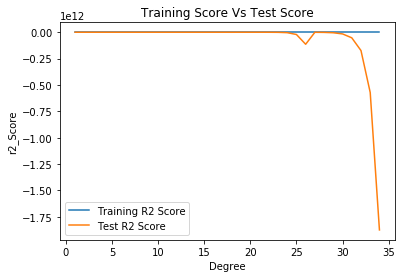

In [0]:
x=np.arange(34)+1
plt.plot(x,train,label="Training R2 Score")
plt.plot(x,test,label="Test R2 Score")

plt.xlabel("Degree")
plt.ylabel("r2_Score")

plt.title("Training Score Vs Test Score")

plt.legend()
plt.show()

### As the distinction is not clear, we find the the degree with least difference between Training Score and Test Score

In [0]:
train=np.array(train)
test=np.array(test)

difference=np.subtract(test,train)

absolute_difference=np.abs(difference)

print("The degree with least difference between Training Score and Test Score is ",np.argmin(absolute_difference)+1)

The degree with least difference between Training Score and Test Score is  6


#### Plotting the curve for degree=6

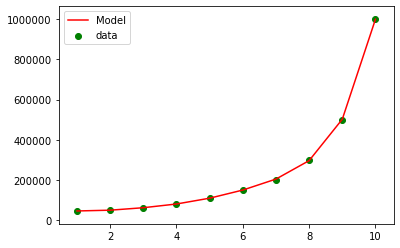

The r2 score of the model is  0.9999494749253776
RMSE score of the model is  16512.54757112578


In [0]:
plot_polyCurve(X,y,6)
print("RMSE score of the model is ",np.sqrt(mean_squared_error(y_test,y_pred)))